# 项目：用逻辑回归制作评分卡

## 项目背景：
    在银行借贷场景中，评分卡作为经典的模型可衡量客户的信用风险大小，根据评分卡的分数高低来决定贷款与否。对于个人来说，常说的“评分卡”又称为申请者评级模型，主要用于新用户的主体评级，即通过信用分高低来判断是否借钱给一个新用户。

### 数据集

特征\标签|含义
:---:|:---:|
SeriousDlqin2yrs|出现90天或更长时间的逾期行为（即定义好坏客户）
RevolvingUtilizationOfUnsecuredLines|贷款以及信用卡可用额度与总额度比例
age|借款人借款年龄
NumberOfTime30-59DaysPastDueNotWorse|过去两年内出现35-59天逾期但是没有发展得更坏的次数
DebtRatio|每月偿还债务，赡养费，生活费用除以月总收入
MonthlyIncome|月收入
NumberOfOpenCreditLinesAndLoans|开放式贷款和信贷数量
NumberOfTimes90DaysLate|过去两年内出现90天逾期或更坏的次数
NumberRealEstateLoansOrLines|抵押贷款和房地产贷款数量，包括房屋净值信贷额度
NumberOfTime60-89DaysPastDueNotWorse|过去两年内出现60-89天逾期但是没有发展得更坏的次数
NumberOfDependents|家庭中不包括自身的家属人数（配偶，子女等）

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression as LR

In [2]:
data = pd.read_csv(r"E:\ZMC\ML\课件\day08_rankingcard.csv",index_col=0)

In [3]:
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


## 1 探索数据与数据预处理

In [4]:
#观察数据结构
data.shape

(150000, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

### 1.1 去除重复值

In [6]:
#去除重复值
data.drop_duplicates(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149391 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    145563 non-null  float64
dtype

In [7]:
#删除之后恢复索引
data.index = range(data.shape[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    145563 non-null  float64
dtype

### 1.2 填补缺失值

In [8]:
#探索缺失值
data.isnull().mean()

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.025624
dtype: float64

可以看出MonthlyIncome、NumberOfDependents即收入和家属人数有缺失值，其中家属人数缺失较少，可以删除或用均值填补，这里用均值填补；收入是信用评分
很重要的因素，因此必须要填补。这里可以询问相关业务人员，这么重要的参数缺失的原因，可以考虑为收入较低人群刻意不填收入，但也有可能是错误的，这里采用
随机森林算法来填补缺失值。

In [9]:
data["NumberOfDependents"].fillna(int(data["NumberOfDependents"].mean()),inplace=True)

In [10]:
def fill_missing_rf(X,y,to_fill):
    """
    使用随机森林填补一个特征的缺失值的函数
    参数：
    X：要填补的特征矩阵
    y：完整的，没有缺失值的标签
    to_fill：字符串，要填补的那一列的名称
    """
    #构建我们的新特征矩阵和新标签
    df = X.copy()
    fill = df.loc[:,to_fill]
    df = pd.concat([df.loc[:,df.columns != to_fill],pd.DataFrame(y)],axis=1)
    #找出我们的训练集和测试集
    Ytrain = fill[fill.notnull()]
    Ytest = fill[fill.isnull()]
    Xtrain = df.iloc[Ytrain.index,:]
    Xtest = df.iloc[Ytest.index,:]
    #用随机森林回归来填补缺失值
    from sklearn.ensemble import RandomForestRegressor as rfr
    rfr = rfr(n_estimators=100)
    rfr = rfr.fit(Xtrain, Ytrain)
    Ypredict = rfr.predict(Xtest)
    return Ypredict

In [11]:
X = data.iloc[:,1:]
y = data["SeriousDlqin2yrs"]
X.shape

(149391, 10)

In [12]:
#=====【TIME WARNING：1 min】=====#
y_pred = fill_missing_rf(X,y,"MonthlyIncome")
#确认我们的结果合理之后，我们就可以将数据覆盖了
data.loc[data.loc[:,"MonthlyIncome"].isnull(),"MonthlyIncome"] = y_pred

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         149391 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    149391 non-null  float64
dtype

### 1.3 描述性统计处理异常值

In [14]:
#描述性统计
data.describe([0.01,0.1,0.25,.5,.75,.9,.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
SeriousDlqin2yrs,149391.0,0.066999,0.250021,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
RevolvingUtilizationOfUnsecuredLines,149391.0,6.071087,250.263672,0.0,0.0,0.003199,0.030132,0.154235,0.556494,0.978007,1.093922,50708.0
age,149391.0,52.306237,14.725962,0.0,24.0,33.000000,41.000000,52.000000,63.000000,72.000000,87.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,149391.0,0.393886,3.852953,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,98.0
DebtRatio,149391.0,354.436740,2041.843455,0.0,0.0,0.034991,0.177441,0.368234,0.875279,1275.000000,4985.100000,329664.0
MonthlyIncome,149391.0,5426.034765,13257.561074,0.0,0.0,0.180000,1800.000000,4417.000000,7416.000000,10800.000000,23250.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,149391.0,8.480892,5.136515,0.0,0.0,3.000000,5.000000,8.000000,11.000000,15.000000,24.000000,58.0
NumberOfTimes90DaysLate,149391.0,0.238120,3.826165,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,98.0
NumberRealEstateLoansOrLines,149391.0,1.022391,1.130196,0.0,0.0,0.000000,0.000000,1.000000,2.000000,2.000000,4.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,149391.0,0.212503,3.810523,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,98.0


In [15]:
#可以看到，年龄的最小值居然有0，这不符合银行的业务需求，即便是儿童账户也要至少8岁，我们可以查看一下年龄为0的人有多少
(data["age"] == 0).sum()

1

In [16]:
#发现只有一个人年龄为0，可以判断这肯定是录入失误造成的，可以当成是缺失值来处理，直接删除掉这个样本
data = data[data["age"] != 0]

In [17]:
#可以看到，贷款以及信用卡可用额度与总额度比例应该是0到1之间。这里可以询问业务人员比例具体大小为多少，这里做删除处理。
(data["RevolvingUtilizationOfUnsecuredLines"] > 1).sum()

3321

In [18]:
data = data[data["RevolvingUtilizationOfUnsecuredLines"] <= 1]

In [19]:
#描述性统计
data.describe([0.01,0.1,0.25,.5,.75,.9,.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
SeriousDlqin2yrs,146069.0,0.060054,0.237587,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.00,1.0
RevolvingUtilizationOfUnsecuredLines,146069.0,0.302990,0.336828,0.0,0.0,0.002890,0.028848,0.144515,0.517741,0.932107,1.00,1.0
age,146069.0,52.494184,14.715426,21.0,24.0,33.000000,42.000000,52.000000,63.000000,72.000000,87.00,109.0
NumberOfTime30-59DaysPastDueNotWorse,146069.0,0.379731,3.890003,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.00,98.0
DebtRatio,146069.0,356.923446,2059.996861,0.0,0.0,0.033983,0.177346,0.368059,0.877956,1292.000000,4998.00,329664.0
MonthlyIncome,146069.0,5447.807522,13385.005602,0.0,0.0,0.170000,1800.000000,4467.000000,7474.000000,10833.000000,23332.32,3008750.0
NumberOfOpenCreditLinesAndLoans,146069.0,8.528819,5.148866,0.0,0.0,3.000000,5.000000,8.000000,11.000000,15.000000,25.00,58.0
NumberOfTimes90DaysLate,146069.0,0.229036,3.863788,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.00,98.0
NumberRealEstateLoansOrLines,146069.0,1.030123,1.132322,0.0,0.0,0.000000,0.000000,1.000000,2.000000,2.000000,4.00,54.0
NumberOfTime60-89DaysPastDueNotWorse,146069.0,0.207505,3.851322,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.00,98.0


In [20]:
"""
另外，有三个指标看起来很奇怪：
"NumberOfTime30-59DaysPastDueNotWorse"
"NumberOfTime60-89DaysPastDueNotWorse"
"NumberOfTimes90DaysLate"
这三个指标分别是“过去两年内出现35-59天逾期但是没有发展的更坏的次数”，“过去两年内出现60-89天逾期但是没
有发展的更坏的次数”,“过去两年内出现90天逾期的次数”。这三个指标，在99%的分布的时候依然是2或3，最大值却是
98，看起来非常奇怪。一个人在过去两年内逾期35~59天98次，一年也就365天，两年内逾期98次这是怎么算出来的？
我们可以去咨询业务人员，请教他们这个逾期次数是如何计算的。如果这个指标是正常的，那这些两年内逾期了98次的
客户，应该都是坏客户。在我们无法询问他们情况下，我们查看一下有多少个样本存在这种异常：
"""
data[data.loc[:,"NumberOfTimes90DaysLate"] > 90].count()

SeriousDlqin2yrs                        225
RevolvingUtilizationOfUnsecuredLines    225
age                                     225
NumberOfTime30-59DaysPastDueNotWorse    225
DebtRatio                               225
MonthlyIncome                           225
NumberOfOpenCreditLinesAndLoans         225
NumberOfTimes90DaysLate                 225
NumberRealEstateLoansOrLines            225
NumberOfTime60-89DaysPastDueNotWorse    225
NumberOfDependents                      225
dtype: int64

In [21]:
data[data.loc[:,"NumberOfTimes90DaysLate"] > 90]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1732,1,1.0,27,98,0.0,2700.000000,0,98,0,98,0.0
2285,0,1.0,22,98,0.0,1244.811903,0,98,0,98,0.0
3883,0,1.0,38,98,12.0,2761.520000,0,98,0,98,0.0
4416,0,1.0,21,98,0.0,0.000000,0,98,0,98,0.0
4704,0,1.0,21,98,0.0,2000.000000,0,98,0,98,0.0
...,...,...,...,...,...,...,...,...,...,...,...
146667,1,1.0,25,98,0.0,2183.285762,0,98,0,98,0.0
147180,1,1.0,68,98,255.0,4.140000,0,98,0,98,0.0
148548,1,1.0,24,98,54.0,623.190000,0,98,0,98,0.0
148634,0,1.0,26,98,0.0,2000.000000,0,98,0,98,0.0


In [22]:
#有225个样本存在这样的情况，并且这些样本，我们观察一下，标签并不都是1，他们并不都是坏客户。因此，我们基本可以判断，这些样本是某种异常，应该把它们删除。
data = data[data.loc[:,"NumberOfTimes90DaysLate"] < 90]
#恢复索引
data.index = range(data.shape[0])

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145844 entries, 0 to 145843
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      145844 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  145844 non-null  float64
 2   age                                   145844 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  145844 non-null  int64  
 4   DebtRatio                             145844 non-null  float64
 5   MonthlyIncome                         145844 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       145844 non-null  int64  
 7   NumberOfTimes90DaysLate               145844 non-null  int64  
 8   NumberRealEstateLoansOrLines          145844 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  145844 non-null  int64  
 10  NumberOfDependents                    145844 non-null  float64
dtype

### 1.4 样本标准化

虽然样本标准化后，数据会更加美观，但是其表达的含义却变得不直观了，比如月收入标准化到0-1之间后，业务人员拿到评分卡后并不能快速理解其含义，
所以这会让业务人员感到困惑，反而不能推动业务落地。因此这里不进行样本标准化处理。

### 1.5 样本不均衡问题

In [24]:
#探索标签的分布
X = data.iloc[:,1:]
y = data.iloc[:,0]
y.value_counts()

0    137208
1      8636
Name: SeriousDlqin2yrs, dtype: int64

In [25]:
n_sample = X.shape[0]
n_1_sample = y.value_counts()[1]
n_0_sample = y.value_counts()[0]
print('样本个数：{}; 1占{:.2%}; 0占{:.2%}'.format(n_sample,n_1_sample/n_sample,n_0_sample/n_sample))

样本个数：145844; 1占5.92%; 0占94.08%


可以看到银行实际守约人数占比高达94，而违约人数仅为6%左右，因此这是一个样本及其不均衡的问题。但是银行却需要捕捉出恶意违约的客户来避免信贷
损失，这里采用上采样的方法来平衡样本。

In [26]:
from imblearn.over_sampling import SMOTE
#imblearn是专门用来处理不平衡数据集的库，在处理样本不均衡问题中性能高过sklearn很多
sm = SMOTE(random_state=42) #实例化
X,y = sm.fit_sample(X,y)
n_sample_ = X.shape[0]
pd.Series(y).value_counts()

1    137208
0    137208
Name: SeriousDlqin2yrs, dtype: int64

In [27]:
n_1_sample = pd.Series(y).value_counts()[1]
n_0_sample = pd.Series(y).value_counts()[0]
print('样本个数：{}; 1占{:.2%}; 0占{:.2%}'.format(n_sample_,n_1_sample/n_sample_,n_0_sample/n_sample_))

样本个数：274416; 1占50.00%; 0占50.00%


### 1.6 分训练集和测试集

In [28]:
from sklearn.model_selection import train_test_split
X = pd.DataFrame(X)
y = pd.DataFrame(y)
X_train, X_vali, Y_train, Y_vali = train_test_split(X,y,test_size=0.3,random_state=420)
model_data = pd.concat([Y_train, X_train], axis=1)
model_data.index = range(model_data.shape[0])
model_data.columns = data.columns
vali_data = pd.concat([Y_vali, X_vali], axis=1)
vali_data.index = range(vali_data.shape[0])
vali_data.columns = data.columns
model_data.to_csv(r"E:\ZMC\ML\课件\model_data.csv")
vali_data.to_csv(r"E:\ZMC\ML\课件\vali_data.csv")

这里把建模数据即训练集和测试集分别保存到文件夹，以便取用。

## 2 分箱

要制作评分卡，就要对各个特征进行分档，以便业务人员能够根据客户信息进行打分，所以需要对特征进行分箱
分箱的本质就是离散化连续变量，原理类似于聚类。首先要回答的问题就是，分多少个箱子才合适，为了业务的实际性，
分箱个数最好能在4-5个为最佳。

为了衡量特征上的信息量以及特征对预测函数的贡献，银行业定义了概念Information value(IV)：<br>
>$IV=\sum_{i=1}^n(good\%-bad\%)*WOE_i$

其中n是这个特征上箱子的个数，i代表每个箱子,good% 是这个箱内的优质客户（标签为0的客户）占整个特征中所有优质客户的比例，bad%是这个箱子里的坏客户（就是那些会违约，标签为1的那些客户）占整个特征中所有坏
客户的比例，而WOE则写作：

>$WOE_i=ln(good\%\div bad\%)$

这是银行业中用来衡量违约概率的指标，中文叫做证据权重(weight of Evidence)，本质其实就是优质客户比上坏客户的比例的对数。WOE是对一个箱子来说的，WOE越大，代表了这个箱子里的优质客户越多。而IV是对
IV整个特征来说的，IV代表的意义是我们特征上的信息量以及这个特征对模型的贡献，由下表来控制：

IV|特征对预测函数的贡献
:---:|:---:|
< 0.03|特征几乎不带有效信息，对模型没有贡献，这种特征可以被删除
0.03 ~ 0.09|有效信息很少，对模型的贡献度低
0.1 ~ 0.29|有效信息一般，对模型的贡献度中等
0.3 ~ 0.49|有效信息较多，对模型的贡献度较高
>=0.5|有效信息非常多，对模型的贡献超高并且可疑

可见，IV并非越大越好，我们想要找到IV的大小和箱子个数的平衡点。箱子越多，IV必然越小，因为信息损失会非常多，所以，我们会对特征进行分箱，
然后计算每个特征在每个箱子数目下的WOE值，利用IV值的曲线，找出合适的分箱个数。

其次，分箱要达到一定的效果，希望在同一个箱子内的人的属性是尽量相似的，而不同箱子的人的属性是尽量不同的，即组间差异大，组内差异小。
对于评分卡来说，就是说我们希望一个箱子内的人违约概率是类似的，而不同箱子的人的违约概率差距很大。可以使用卡方检验来对比两个箱子之间的相似性，
如果两个箱子之间卡方检验的P值很大，则说明他们非常相似，那我们就可以将这两个箱子合并为一个箱子。

### 2.1 等频分箱

In [29]:
#按照等频对需要分箱的列进行分箱
model_data["qcut"], updown = pd.qcut(model_data["age"], retbins=True, q=20)

In [30]:
# 这里使用了数据透视表的功能groupby
coount_y0 = model_data[model_data["SeriousDlqin2yrs"] == 0].groupby(by="qcut").count()["SeriousDlqin2yrs"]
coount_y1 = model_data[model_data["SeriousDlqin2yrs"] == 1].groupby(by="qcut").count()["SeriousDlqin2yrs"]

In [31]:
#num_bins值分别为每个区间的上界，下界，0出现的次数，1出现的次数
num_bins = [*zip(updown,updown[1:],coount_y0,coount_y1)]

In [32]:
#注意zip会按照最短列来进行结合
num_bins

[(21.0, 28.0, 4124, 7269),
 (28.0, 31.0, 3411, 5554),
 (31.0, 34.0, 3840, 6343),
 (34.0, 37.0, 4383, 6443),
 (37.0, 39.0, 3505, 5041),
 (39.0, 41.0, 3875, 5620),
 (41.0, 43.0, 3924, 5688),
 (43.0, 45.0, 4271, 5624),
 (45.0, 47.0, 4662, 6438),
 (47.0, 49.0, 4878, 6238),
 (49.0, 50.0, 2372, 3094),
 (50.0, 52.0, 4651, 5823),
 (52.0, 54.0, 4622, 5053),
 (54.0, 56.0, 4569, 4181),
 (56.0, 59.0, 6606, 5334),
 (59.0, 61.0, 4483, 3089),
 (61.0, 64.0, 6911, 3164),
 (64.0, 68.0, 6623, 2352),
 (68.0, 74.0, 6795, 2042),
 (74.0, 107.0, 7744, 1452)]

In [33]:
0 in num_bins[0][2:]

False

### 2.2 定义WOE和IV函数

In [34]:
#计算WOE和BAD RATE
#bad_rate与bad%不是一个东西
#bad_rate是一个箱中，坏的样本所占的比例 (bad/total)
#而bad%是一个箱中的坏样本占整个特征中的坏样本的比例
def get_woe(num_bins):
    # 通过 num_bins 数据计算 woe
    columns = ["min","max","count_0","count_1"]
    df = pd.DataFrame(num_bins,columns=columns)
    df["total"] = df.count_0 + df.count_1
    df["percentage"] = df.total / df.total.sum()
    df["bad_rate"] = df.count_1 / df.total
    df["good%"] = df.count_0/df.count_0.sum()
    df["bad%"] = df.count_1/df.count_1.sum()
    df["woe"] = np.log(df["good%"] / df["bad%"])
    return df
#计算IV值
def get_iv(df):
    rate = df["good%"] - df["bad%"]
    iv = np.sum(rate * df.woe)
    return iv

### 2.3 选取最佳分箱个数函数

In [35]:
def graphforbestbin(DF, X, Y, n=5,q=20,graph=True):
    """
    自动最优分箱函数，基于卡方检验的分箱参数：
    DF: 需要输入的数据
    X: 需要分箱的列名
    Y: 分箱数据对应的标签 Y 列名
    n: 保留分箱个数
    q: 初始分箱的个数
    graph: 是否要画出IV图像
    区间为前开后闭 (]
    """
    DF = DF[[X,Y]].copy()
    DF["qcut"],bins = pd.qcut(DF[X], retbins=True, q=q,duplicates="drop") #等频分箱
    coount_y0 = DF.loc[DF[Y]==0].groupby(by="qcut").count()[Y] #每个箱子中好客户的个数
    coount_y1 = DF.loc[DF[Y]==1].groupby(by="qcut").count()[Y] #每个箱子中坏客户的个数
    num_bins = [*zip(bins,bins[1:],coount_y0,coount_y1)]
    # 确保每个箱子中都有好客户和坏客户
    for i in range(q):
        if 0 in num_bins[0][2:]:
            num_bins[0:2] = [(
                        num_bins[0][0],
                        num_bins[1][1],
                        num_bins[0][2]+num_bins[1][2],
                            num_bins[0][3]+num_bins[1][3])]
        continue
    for i in range(len(num_bins)):
        if 0 in num_bins[i][2:]:
            num_bins[i-1:i+1] = [(
            num_bins[i-1][0],
            num_bins[i][1],
            num_bins[i-1][2]+num_bins[i][2],
            num_bins[i-1][3]+num_bins[i][3])]
            break
        else:
            break
    #定义WOE函数和IV函数
    def get_woe(num_bins):
        columns = ["min","max","count_0","count_1"]
        df = pd.DataFrame(num_bins,columns=columns)
        df["total"] = df.count_0 + df.count_1
        df["percentage"] = df.total / df.total.sum()
        df["bad_rate"] = df.count_1 / df.total
        df["good%"] = df.count_0/df.count_0.sum()
        df["bad%"] = df.count_1/df.count_1.sum()
        df["woe"] = np.log(df["good%"] / df["bad%"])
        return df
    def get_iv(df):
        rate = df["good%"] - df["bad%"]
        iv = np.sum(rate * df.woe)
        return iv
    #对箱子两两之间进行卡方检验并合并相似箱子
    IV = []
    axisx = []
    import scipy
    while len(num_bins) > n:
        pvs = []
        for i in range(len(num_bins)-1):
            x1 = num_bins[i][2:]
            x2 = num_bins[i+1][2:]
            # 获取 num_bins_两两之间的卡方检验的置信度（或卡方值），0 返回 chi2 值，1 返回 p 值
            pv = scipy.stats.chi2_contingency([x1,x2])[1]
            pvs.append(pv)
        # 通过 p 值进行处理。合并 p 值最大的两组
        i = pvs.index(max(pvs))
        num_bins[i:i+2] = [(
                num_bins[i][0],
                num_bins[i+1][1],
                num_bins[i][2]+num_bins[i+1][2],
                num_bins[i][3]+num_bins[i+1][3])]
        bins_df = pd.DataFrame(get_woe(num_bins))
        axisx.append(len(num_bins))
        IV.append(get_iv(bins_df))
    # 绘制IV曲线获得最佳分箱个数
    import matplotlib.pyplot  as plt
    if graph:
        plt.figure()
        plt.plot(axisx,IV)
        plt.xticks(axisx)
        plt.xlabel("number of box")
        plt.ylabel("IV")
        plt.show()
    return bins_df

In [36]:
model_data.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'qcut'],
      dtype='object')

RevolvingUtilizationOfUnsecuredLines


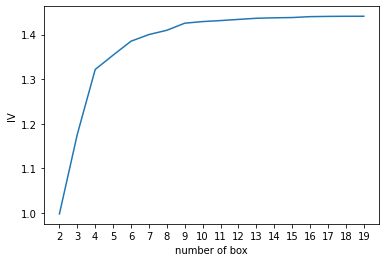

age


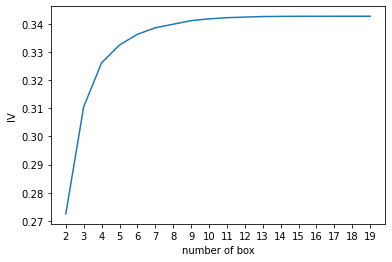

NumberOfTime30-59DaysPastDueNotWorse


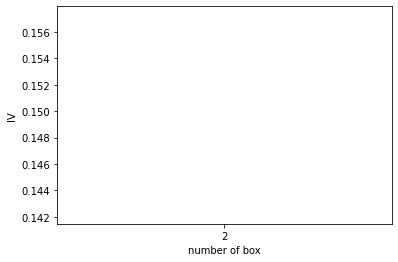

DebtRatio


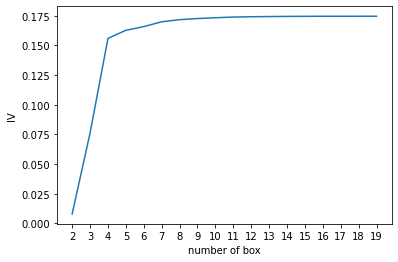

MonthlyIncome


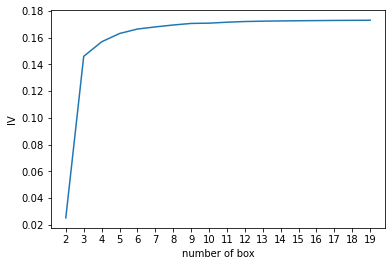

NumberOfOpenCreditLinesAndLoans


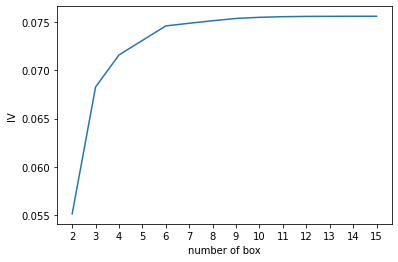

NumberOfTimes90DaysLate


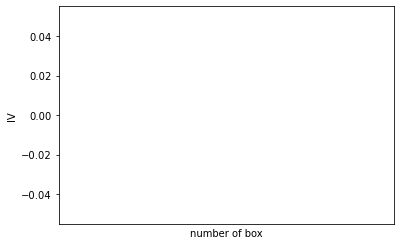

UnboundLocalError: local variable 'bins_df' referenced before assignment

In [37]:
for i in model_data.columns[1:-1]:
    print(i)
    graphforbestbin(model_data,i,"SeriousDlqin2yrs",n=2,q=20)

我们发现，不是所有的特征都可以使用这个分箱函数，比如说有的特征，像家人数量，就无法分出20组。于是我们
将可以分箱的特征放出来单独分组，不能自动分箱的变量自己观察然后手写

In [38]:
auto_col_bins = {"RevolvingUtilizationOfUnsecuredLines":6,
"age":5,
"DebtRatio":4,
"MonthlyIncome":3,
"NumberOfOpenCreditLinesAndLoans":5}
#不能使用自动分箱的变量
hand_bins = {"NumberOfTime30-59DaysPastDueNotWorse":[0,1,2,13]
,"NumberOfTimes90DaysLate":[0,1,2,17]
,"NumberRealEstateLoansOrLines":[0,1,2,4,54]
,"NumberOfTime60-89DaysPastDueNotWorse":[0,1,2,8]
,"NumberOfDependents":[0,1,2,3]}
#保证区间覆盖使用 np.inf替换最大值，用-np.inf替换最小值
hand_bins = {k:[-np.inf,*v[:-1],np.inf] for k,v in hand_bins.items()}

接下来对所有特征按照选择的箱体个数和手写的分箱范围进行分箱：

In [39]:
bins_of_col = {}
# 生成自动分箱的分箱区间和分箱后的 IV 值
for col in auto_col_bins:
    bins_df = graphforbestbin(model_data,col
    ,"SeriousDlqin2yrs"
    ,n=auto_col_bins[col]
    #使用字典的性质来取出每个特征所对应的箱的数量
    ,q=20
    ,graph=False)
    bins_list = sorted(set(bins_df["min"]).union(bins_df["max"]))
    #保证区间覆盖使用 np.inf 替换最大值 -np.inf 替换最小值
    bins_list[0],bins_list[-1] = -np.inf,np.inf
    bins_of_col[col] = bins_list
#合并手动分箱数据
bins_of_col.update(hand_bins)
bins_of_col

{'RevolvingUtilizationOfUnsecuredLines': [-inf,
  0.056882398,
  0.20007953719053626,
  0.3436333330627812,
  0.6549553556555197,
  0.9782743706682488,
  inf],
 'age': [-inf, 34.0, 54.0, 61.0, 74.0, inf],
 'DebtRatio': [-inf, 0.017093959, 0.3625751530511325, 1.501248959, inf],
 'MonthlyIncome': [-inf, 0.1, 6243.159109383247, inf],
 'NumberOfOpenCreditLinesAndLoans': [-inf, 1.0, 3.0, 5.0, 17.0, inf],
 'NumberOfTime30-59DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfTimes90DaysLate': [-inf, 0, 1, 2, inf],
 'NumberRealEstateLoansOrLines': [-inf, 0, 1, 2, 4, inf],
 'NumberOfTime60-89DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfDependents': [-inf, 0, 1, 2, inf]}

### 2.4 计算各箱的WOE并映射到数据中

我们现在已经有了我们的箱子，接下来我们要做的是计算各箱的WOE，并且把WOE替换到我们的原始数据
model_data中，因为我们将使用WOE覆盖后的数据来建模，我们希望获取的是”各个箱”的分类结果，即评分卡上
各个评分项目的分类结果。

In [40]:
def get_woe(df,col,y,bins):
    df = df[[col,y]].copy()
    df["cut"] = pd.cut(df[col],bins) #函数pd.cut，可以根据已知的分箱间隔把数据分箱
    bins_df = df.groupby("cut")[y].value_counts().unstack() #将数据按分箱结果聚合，并取出其中的标签值
    woe = bins_df["woe"] = np.log((bins_df[0]/bins_df[0].sum())/(bins_df[1]/bins_df[1].sum()))
    return woe
#将所有特征的WOE存储到字典当中
woeall = {}
for col in bins_of_col:
    woeall[col] = get_woe(model_data,col,"SeriousDlqin2yrs",bins_of_col[col])
woeall

{'RevolvingUtilizationOfUnsecuredLines': cut
 (-inf, 0.0569]    2.291324
 (0.0569, 0.2]     0.983442
 (0.2, 0.344]      0.127662
 (0.344, 0.655]   -0.618395
 (0.655, 0.978]   -1.324128
 (0.978, inf]     -0.674746
 dtype: float64,
 'age': cut
 (-inf, 34.0]   -0.525957
 (34.0, 54.0]   -0.295644
 (54.0, 61.0]    0.212730
 (61.0, 74.0]    0.985204
 (74.0, inf]     1.669739
 dtype: float64,
 'DebtRatio': cut
 (-inf, 0.0171]     1.521945
 (0.0171, 0.363]    0.077853
 (0.363, 1.501]    -0.378612
 (1.501, inf]       0.179525
 dtype: float64,
 'MonthlyIncome': cut
 (-inf, 0.1]        1.537218
 (0.1, 6243.159]   -0.211899
 (6243.159, inf]    0.243468
 dtype: float64,
 'NumberOfOpenCreditLinesAndLoans': cut
 (-inf, 1.0]   -0.901265
 (1.0, 3.0]    -0.322159
 (3.0, 5.0]     0.008568
 (5.0, 17.0]    0.116643
 (17.0, inf]    0.367096
 dtype: float64,
 'NumberOfTime30-59DaysPastDueNotWorse': cut
 (-inf, 0.0]    0.305042
 (0.0, 1.0]    -0.843386
 (1.0, 2.0]    -1.294196
 (2.0, inf]    -1.450124
 dtype:

In [41]:
#不希望覆盖掉原本的数据，创建一个新的DataFrame，索引和原始数据model_data一模一样
model_woe = pd.DataFrame(index=model_data.index)
#对所有特征按箱的结果把WOE结构用map函数映射到数据中：
for col in bins_of_col:
    model_woe[col] = pd.cut(model_data[col],bins_of_col[col]).map(woeall[col])
#将标签补充到数据中
model_woe["SeriousDlqin2yrs"] = model_data["SeriousDlqin2yrs"]
model_woe

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,2.291324,0.985204,0.179525,1.537218,0.116643,0.305042,0.212016,0.168111,0.105547,0.632214,0
1,-0.674746,-0.295644,0.179525,-0.211899,-0.901265,0.305042,0.212016,-0.365971,0.105547,0.632214,0
2,2.291324,0.985204,0.077853,0.243468,0.008568,0.305042,0.212016,0.168111,-1.354909,-0.612826,0
3,2.291324,-0.295644,0.077853,-0.211899,-0.322159,0.305042,-2.389980,-0.365971,0.105547,-0.612826,1
4,0.983442,-0.295644,-0.378612,0.243468,0.116643,0.305042,0.212016,0.329319,0.105547,-0.479729,0
...,...,...,...,...,...,...,...,...,...,...,...
192086,0.983442,-0.295644,0.077853,0.243468,0.116643,0.305042,0.212016,-0.365971,0.105547,-0.479729,1
192087,0.983442,-0.295644,0.077853,0.243468,0.116643,-0.843386,0.212016,0.168111,0.105547,-0.479729,0
192088,-0.618395,-0.525957,0.077853,-0.211899,0.008568,0.305042,0.212016,-0.365971,0.105547,0.632214,1
192089,2.291324,0.212730,-0.378612,0.243468,0.116643,0.305042,0.212016,0.574852,0.105547,-0.612826,0


## 3.建模与模型验证

In [42]:
#处理测试集
vali_woe = pd.DataFrame(index=vali_data.index)
for col in bins_of_col:
    vali_woe[col] = pd.cut(vali_data[col],bins_of_col[col]).map(woeall[col])
vali_woe["SeriousDlqin2yrs"] = vali_data["SeriousDlqin2yrs"]
vali_X = vali_woe.iloc[:,:-1]
vali_y = vali_woe.iloc[:,-1]

In [43]:
# 建模
X = model_woe.iloc[:,:-1]
y = model_woe.iloc[:,-1]
from sklearn.linear_model import LogisticRegression as LR
lr = LR().fit(X,y)

In [44]:
lr.score(vali_X,vali_y)

0.7775766778013969

返回的结果一般，我们可以试着使用C和max_iter的学习曲线把逻辑回归的效果调上去。

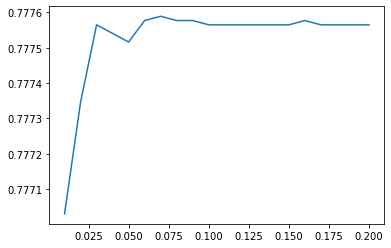

In [45]:
c_1 = np.linspace(0.01,1,20)
c_2 = np.linspace(0.01,0.2,20)
score = []
for i in c_2:
    lr = LR(solver='liblinear',C=i).fit(X,y)
    score.append(lr.score(vali_X,vali_y))
plt.figure()
plt.plot(c_2,score)
plt.show()

In [46]:
lr.n_iter_

array([5], dtype=int32)

In [47]:
lr = LR(solver='liblinear',C=0.075,max_iter=5).fit(X,y)
lr.score(vali_X,vali_y)

C:\Users\ZMC\Saved Games\python3.7\python_3.7.0_x64\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.777588824779836

C:\Users\ZMC\Saved Games\python3.7\python_3.7.0_x64\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\ZMC\Saved Games\python3.7\python_3.7.0_x64\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\ZMC\Saved Games\python3.7\python_3.7.0_x64\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\ZMC\Saved Games\python3.7\python_3.7.0_x64\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\ZMC\Saved Games\python3.7\python_3.7.0_x64\lib\site-packages\sk

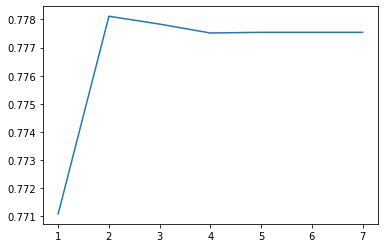

In [48]:
score = []
for i in [1,2,3,4,5,6,7]:
    lr = LR(solver='liblinear',C=0.035,max_iter=i).fit(X,y)
    score.append(lr.score(vali_X,vali_y))
plt.figure()
plt.plot([1,2,3,4,5,6,7],score)
plt.show()

In [49]:
lr = LR(solver='liblinear',C=0.075,max_iter=2).fit(X,y)
lr.score(vali_X,vali_y)

C:\Users\ZMC\Saved Games\python3.7\python_3.7.0_x64\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.778123291831157

从学习曲线可以看出C为0.035，max_iter为2时，回归效果最好约为0.778，但是也不是很好。

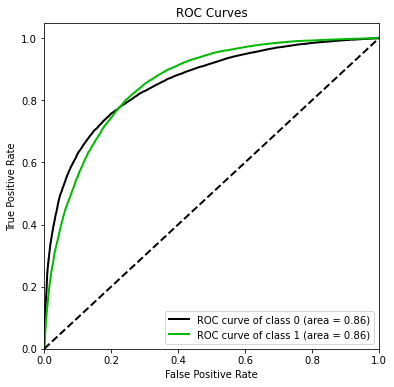

In [51]:
import scikitplot as skplt
vali_proba_df = pd.DataFrame(lr.predict_proba(vali_X))
skplt.metrics.plot_roc(vali_y, vali_proba_df,plot_micro=False,figsize=(6,6),plot_macro=False)

## 4.制作评分卡

使用准确率和ROC曲线验证了模型的预测能力。现在将逻辑回归转换为标准评分卡。评分卡中的分数，由以下公式计算：<br>
>$score=A-B*log(odds)$

其中A与B是常数，A叫做“补偿”，B叫做“刻度”， 代表了一个人违约的可能性。两个常数可以通过两个假
设的分值带入公式求出，这两个假设分别是<br>
+ 1. 某个特定的违约概率下的预期分值
+ 2. 指定的违约概率翻倍的分数（PDO）<br>
例如，假设对数几率为时设定的特定分数为600，PDO=20，那么对数几率为时的分数就是620。带入以上线
性表达式，可以得到：

>$600=A-B*log(1/60)$<br>
>$650=A-B*log(1/30)$

In [52]:
B = 20/np.log(2)
A = 600 + B*np.log(1/60)
A,B

(481.8621880878296, 28.85390081777927)

In [57]:
base_score = A - B*lr.intercept_

通过循环，将所有特征的评分卡内容全部一次性写往一个本地文件ScoreData.csv：

In [60]:
file = r'E:\ZMC\Data analyse\ScoreData.csv'
#首先写入基准分数
#之后使用循环，每次生成一组分档和分数，不断写入文件之中
with open(file,"w") as fdata:
    fdata.write("base_score,{}\n".format(base_score))
for i,col in enumerate(X.columns):
    score = woeall[col] * (-B*lr.coef_[0][i])
    score.name = "Score"
    score.index.name = col
    score.to_csv(file,header=True,mode="a")